<a href="https://colab.research.google.com/github/julianamo93/CP1_2TDSZ-Disruptive-Architectures-IOT-IOB-and-Generative-AI/blob/main/CP1_2TDSZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Disruptive Architectures IOT, IOB and Generative AI**
- Juliana Moreira - RM: 554113
- Kevin Nobre - RM: 552590

### **CheckPoint 01 - 2TDSZ**

*   Dataset - HouseHold_Power
*   Descrição: Medição de consumo de energia elétrica em uma casa com taxa de amostragem de um minuto ao longo de um período de quase 04 anos. Diferentes grandezas elétricas e alguns valores de submedição estão
disponíveis.
*   Valores ausentes: Sim
*   Tamanho do dataset: 133MB
*   Objetivo: Regressão/Clustering

Importação de Bibliotecas para realização do CheckPoint 01. Bibliotecas padrão para análise e desenvolvimento de DL/ML.

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Importação do Dados

Importando os dados do dataset HouseHold Power.


In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';')
df.head()

<ipython-input-2-8b38190bc575>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Análise Exploratória

Iniciando a análise exploratória (EDA), com os dados do dataset.

In [ ]:
df.shape

(2075259, 9)

In [ ]:
# df.describe() -- não utilizamos o describe() porque não temos dados numéricos,
# então vamos transformar os dados em numéricos para poder usar o describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
100 * (25979 / 2075259)

1.2518437457686005

In [ ]:
df = df.drop(['Date', 'Time'], axis=1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Convertendo as Colunas para valores

In [ ]:
# Converter as colunas 'object' para 'float64'
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# verificando se existem células vazias e somando os registros encontrados...
df.isna().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [ ]:
# Criando um novo dataframe eliminando as células vazias
df1 = df.dropna()

In [ ]:
# Verificando se existem células vazias e somando os registros encontrados
df1.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
df1.shape

(2049280, 7)

## Geração da Amostra de 5% dos Dados

*   Utilizando sample, que preserva nossas colunas e pega apenas a porcentagem escolhida.

In [ ]:
# df2 ---> amostra de 5%
df2 = df1.sample(frac=0.05, random_state=10)

In [ ]:
df2.shape

(102464, 7)

## Aplicação do Principal Component Analysis (PCA) ---> Redução de Dimensionalidade

In [ ]:
# Número original de atributos = 7
# Número de Componentes após a redução =
n = 3
pca = PCA(n_components=n)

In [ ]:
X_pca = pca.fit_transform(df2)
X_pca.shape

(102464, 3)

In [ ]:
X_pca.shape

(102464, 3)

In [ ]:
# O método "explained_variance_ratio_" ajuda a
# porcentagem de variância dos dados que consegue ser explicada por cada um dos componentes selecionados
pca.explained_variance_ratio_


array([0.49372793, 0.23576995, 0.19283609])

In [ ]:
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {n} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada.')

O modelo PCA com 3 variáveis explica 92.23 % dos dados de entrada.


## **Agrupamento (Clustering) com K-Means**

*   Global_active_power e Global_reactive_power - escolhidos por medirem o consumo total e apotência reativa, que são características fundamentais para entender o padrão de consumo.
*   Voltage - Para ajudar a identificar variações no consumo associadas a diferentes níveis de tensão.
*   Global_intensity - relaciona-se diretamente à carga total, importante para o perfil de consumo.
*   Sub_metering_1, Sb_metering_2 e Sub_metering_3 - representam o consumo em diferentes áreas, oferecendo uma visão detalhada do padrão de uso.

In [ ]:
df2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## **Atributos Relevantes para o Clustering**
Para escolher os atributos mais relevantes para compor o Clustering e podermos extrair insights que mostrem o que afeta diretamente o consumo de energia, primeiro fizemos uma verificação das colunas e após, selecionamos as colunas que consideramos relevantes.

> Adicionar blockquote



In [ ]:
# Verificando quais colunas são mais relevantes para o Clustering
cols_to_use = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = df2[cols_to_use]

# Verificar os dados
print(X.head())

         Global_active_power  Global_reactive_power  Voltage  \
1766557                0.364                  0.118   242.06   
750095                 1.238                  0.000   242.02   
1110516                0.840                  0.206   241.48   
775087                 0.486                  0.000   242.44   
598955                 1.380                  0.000   244.51   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1766557               1.6             0.0             0.0             0.0  
750095                5.0             0.0             0.0            19.0  
1110516               3.6             0.0             1.0             0.0  
775087                2.0             0.0             0.0             1.0  
598955                5.6             0.0             0.0            18.0  


In [ ]:
df2_selected = df2[['Global_active_power', 'Global_reactive_power', 'Voltage',]]
print("Atributos Relevantes: ", df2_selected.columns)

Atributos Relevantes:  Index(['Global_active_power', 'Global_reactive_power', 'Voltage'], dtype='object')


A escolha das colunas Global-active_power, Global_reactive_power e Voltage influenciam a formação dos clusters porque agrupam padrões de consumo de energia semelhantes.

## **Aplicando o Algoritmo K-Means**
Utilizamos o método inertia, para calcular as distorções, somando as distâncias ao quadrado das amostras até o centro do cluster (centroides), ponderadas pelos pesos das amostras, caso sejam fornecidas.

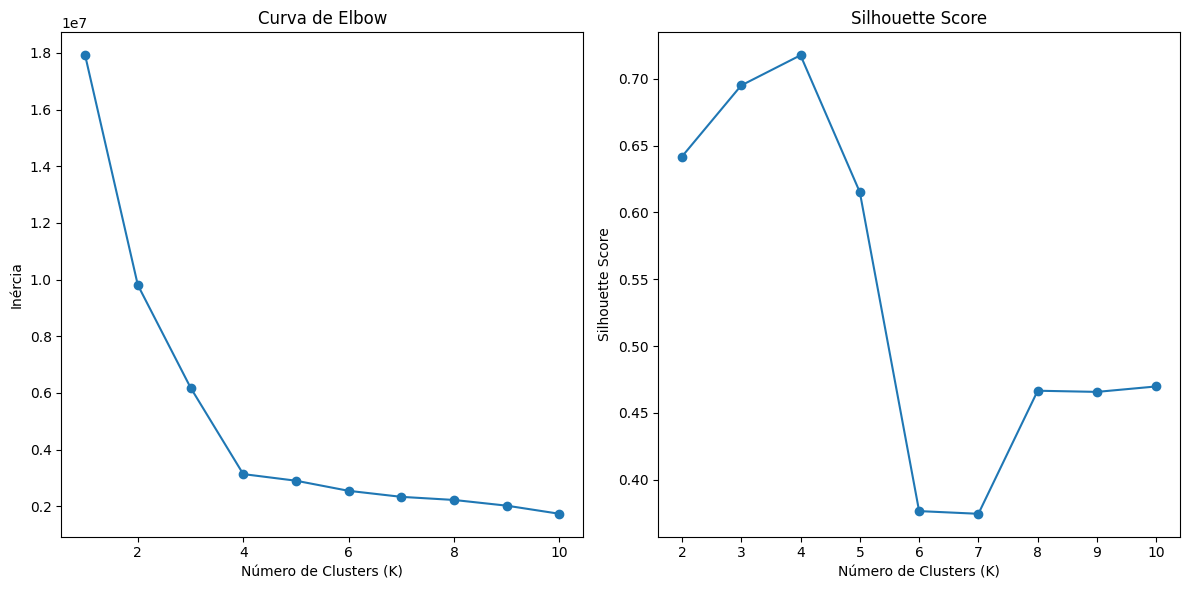

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# definindo a faixa de valores de K  serem testados
k_values = range(1, 11) # teste de 1 a 10 clusters
inertia= []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)

    # adicionando inercia para a curva do cotovelo
    inertia.append(kmeans.inertia_)

    # Calculando o silhouette score se houver pelo menos 2 clusters
    if k > 1 and len(set(kmeans.labels_)) > 1:  # Verifica se há múltiplos clusters
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Plotando a Curva de Elbow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Curva de Elbow')

# Plotando o Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

Após observar a Curva de Elbow, encontramos um ponto onde a redução da Inertia começa a desacelerar, e é esse ponto que encontramos o melhor número de Clusters, que nesse caso é o 4. O silhouette Score é utilizado para avaliar se o número de Clusters escolhido é adequado e tem qualidade, e nesta análise, ainda prosseguiremos com 4 Clusters.

## **Visualizando os Clusters**

*   Agora, vamos visualizar os clusters utilizando gráficos de dispersão.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


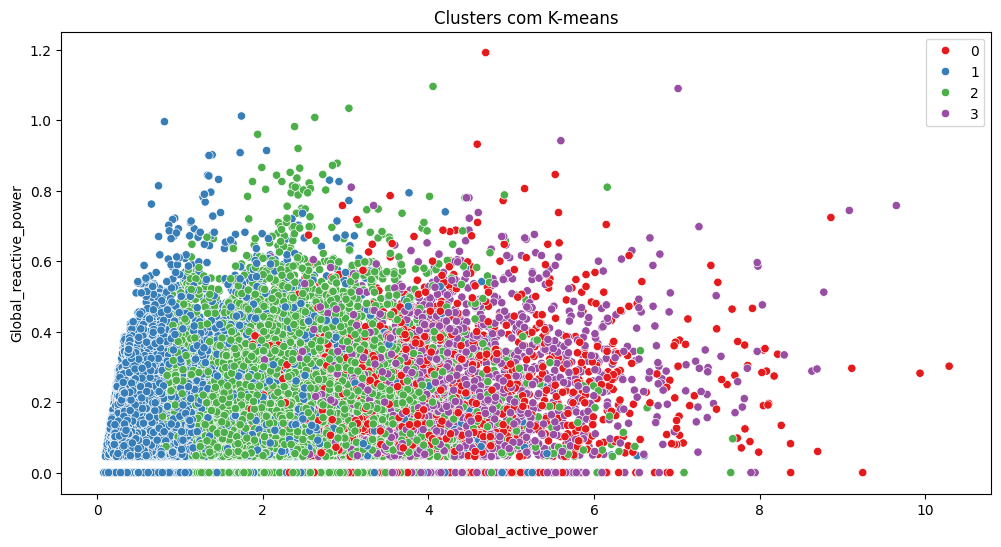

In [ ]:
import seaborn as sns

# Escolhendo o melhor número de Clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=10)
clusters = kmeans.fit_predict(X)
df2['Cluster'] = clusters

# Plotando gráficos de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x='Global_active_power', y='Global_reactive_power', hue='Cluster', palette='Set1')
plt.title('Clusters com K-means')
plt.xlabel('Global_active_power')
plt.ylabel('Global_reactive_power')
plt.legend()
plt.show()

In [ ]:
# número de Clusters de acordo com a base da curva de Elbow
modelo_KMeans = KMeans(n_clusters=4)
modelo_KMeans.fit(df2_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
# Após treinar o modelo, fazemos as predições dos clusters e criamos uma coluna KMeans
df2_selected['clusters'] = modelo_KMeans.predict(df2_selected)

<ipython-input-27-4fd12b86ded4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_selected['clusters'] = modelo_KMeans.predict(df2_selected)


In [ ]:
df2_selected

,Global_active_power,Global_reactive_power,Voltage,clusters
1766557,0.364,0.118,242.06,2
750095,1.238,0.000,242.02,2
1110516,0.840,0.206,241.48,2
775087,0.486,0.000,242.44,2
598955,1.380,0.000,244.51,0
...,...,...,...,...
1912200,1.326,0.090,242.39,2
33277,1.850,0.160,237.81,3
414214,0.424,0.084,239.28,3
205679,1.504,0.144,235.26,1


## **Validação do modelo de Clustering**

Vamos utilizar silhoutte score novamente para validar a qualidade e visualizar os Clusters gerados pelo K-Means em gráficos de dispersão, mostrando como os atributos selecionados se relacionam.

In [ ]:
silhouette = silhouette_score(df2_selected, df2_selected['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.4866


Text(0, 0.5, 'Global Reactive Power')

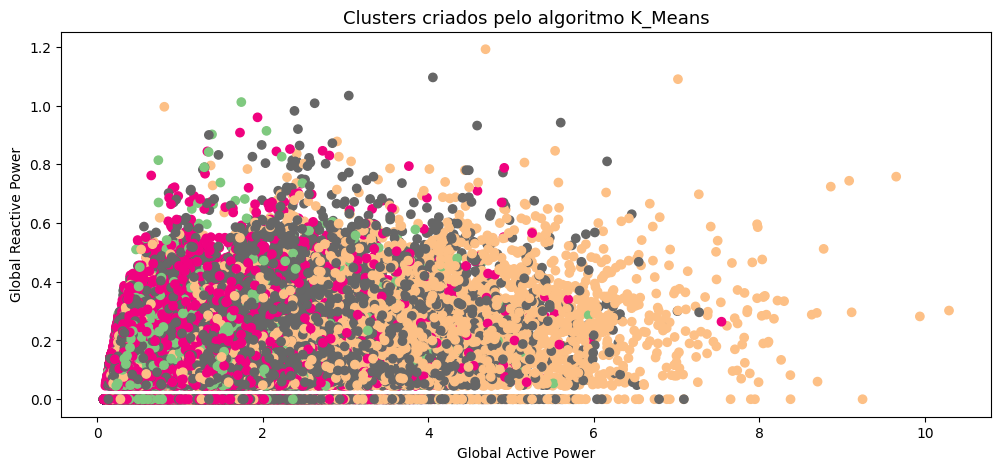

In [ ]:
fig, axes = plt.subplots(1, figsize=(12, 5))

axes.scatter(df2_selected['Global_active_power'], df2_selected['Global_reactive_power'],
             c=df2_selected['clusters'], cmap=plt.cm.Accent)
axes.set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)
axes.set_xlabel('Global Active Power')
axes.set_ylabel('Global Reactive Power')

## **Analisando com PCA**

Nesta aplicação, vamos reduzir a dimensionalidade com o PCA e repetir a análise de clustering e visualização dos resultados.

In [ ]:
# aplicando PCA para visualizar melhor a quantidade de Clusters, que mantivemos a 4
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df2_selected)

In [ ]:
# Utilizando K-Means com PCA
kmeans_pca = KMeans(n_clusters=4)
clusters_pca = kmeans_pca.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


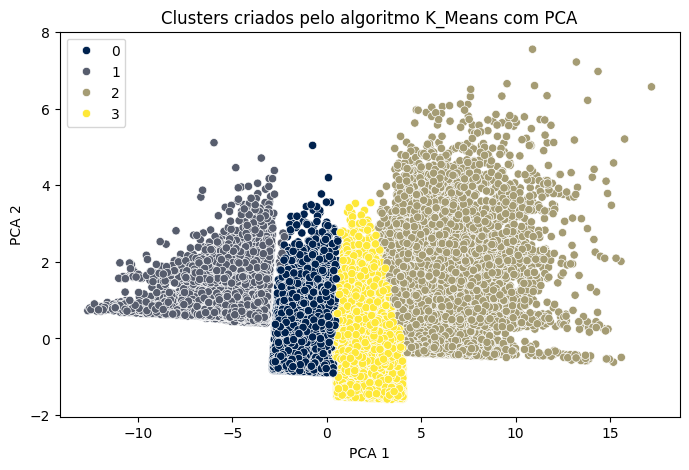

Silhouette Score após PCA: 0.48441311487719013


In [ ]:
# Visualizando os Clusters com PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters_pca, palette='cividis')
plt.title('Clusters criados pelo algoritmo K_Means com PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# Silhouette Score calculado após PCA
sil_score_pca = silhouette_score(df_pca, clusters_pca)
print(f"Silhouette Score após PCA: {sil_score_pca}")